In [137]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# LQ Tracking Demo

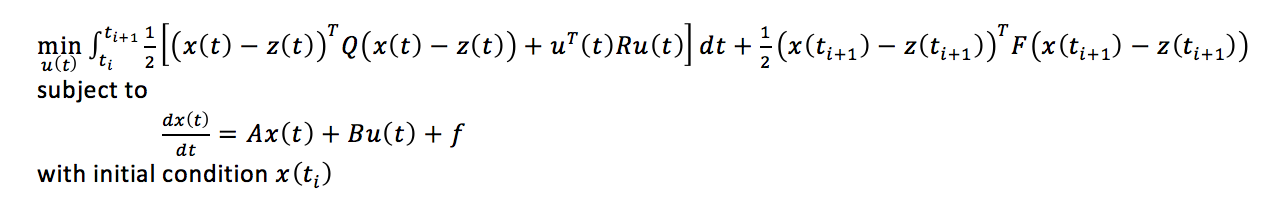

In [1]:
import unittest   
import lqtracker as lqt
import math
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define LQ tracking problem

In [2]:
        stateDim = 3
        controlDim = 3
        dynParA = np.array([[-1.0, 0.1, -0.3], [0.2, -1, 0.1], [0.1, 0.4, -1]])
        dynParB = np.array([[0.5, 0, 0], [0, 0.6, 0], [0, 0, 0.8]])        
        dynParF = np.array([-0.1, -0.02, -0.2])
        trackParQ = np.diag(np.array([50.0,50.0,50.0]))
        trackParR = np.diag(np.array([0.1, 0.1, 0.1]))
        trackParF = np.diag(np.array([50.0,50.0,50.0]))
        outputNum = 100
        integrateTol = 1e-8
        integrateMaxIter = 10000     


# Set starting and tracking data points, and plot

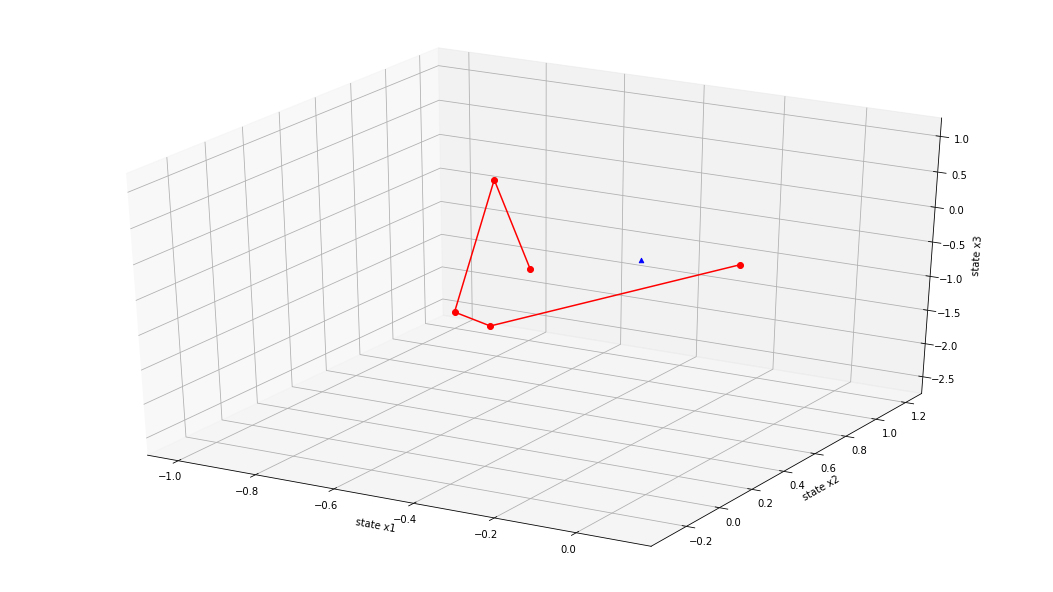

In [3]:
x0 = np.array([0.1,-0.3,1.0]) 
zData = np.array([[-0.2, -0.2,  0.5],[-0.5, 0.3,  0.9],[-1.0, 1.2,  -2.5],[-0.6, 0.5,  -1.5],[-0.1, 0.8,  -0.5]])
zTimeIndex = np.array([[0.0, 0.2],[0.2,0.4],[0.4,0.6],[0.6,0.8],[0.8,1.0]])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
fig.set_size_inches(18.5, 10.5)

xs = zData[:,0]
ys = zData[:,1]
zs = zData[:,2]
ax.plot(xs, ys, zs, c='r', marker='o')

ax.scatter(x0[0], x0[1], x0[2], c='b', marker='^')

ax.set_xlabel('state x1')
ax.set_ylabel('state x2')
ax.set_zlabel('state x3')
    
plt.show()

In [4]:
    import matplotlib as mpl
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D

# Solve LQ tracking problem and plot

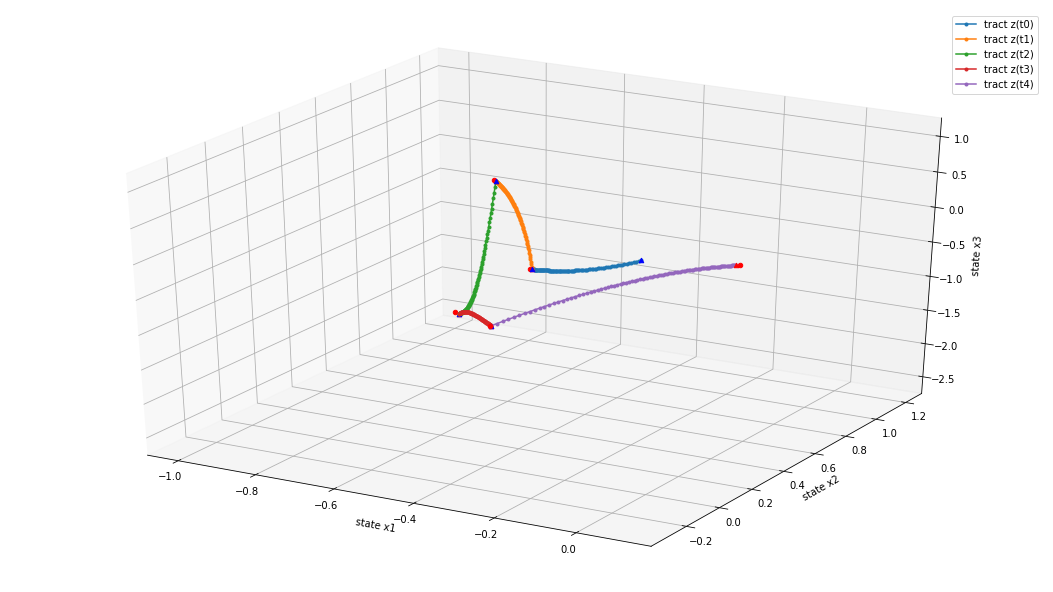

In [5]:
    # call LQ tracker basic (i.e. veriation 1 in Edge Controller doc)
    mpl.rcParams['legend.fontsize'] = 10
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    fig.set_size_inches(18.5, 10.5)
    
    x0 = np.array([0.1,-0.3,1.0]) 
    recordControl = pd.DataFrame()
    for i in range(len(zData)):
        t0 = zTimeIndex[i,0]
        t1 = zTimeIndex[i,1]
        zTrack = pd.DataFrame(np.array([zData[i],zData[i]]), index=zTimeIndex[i])
        zTrack.index.names = ['Time']
        lqtOptimalControl, lqtOptimalState = lqt.lqtracker_basic(t0, t1, x0, stateDim, controlDim,  
                                                             zTrack, dynParA, dynParB, 
                                                             dynParF, trackParQ, 
                                                             trackParR, trackParF, outputNum,
                                                             integrateTol, integrateMaxIter)

        recordControl = recordControl.append(lqtOptimalControl)
        ploty0=lqtOptimalState.values[:,0]
        ploty1=lqtOptimalState.values[:,1]
        ploty2=lqtOptimalState.values[:,2]
        ax.plot(ploty0, ploty1, ploty2, label=("tract z(t"+str(i)+")"), marker='.')
        ax.scatter(zTrack.values[1,0], zTrack.values[1,1], zTrack.values[1,2], c='r', marker='o')
        ax.scatter(x0[0], x0[1], x0[2], c='b', marker='^')
        ax.scatter(lqtOptimalState.values[-1][0], lqtOptimalState.values[-1][1], lqtOptimalState.values[-1][2], c='r', marker='^')
        ax.legend()

        #update x0
        x0 = lqtOptimalState.values[-1]
    ax.set_xlabel('state x1')
    ax.set_ylabel('state x2')
    ax.set_zlabel('state x3')
    plt.show()


# Plot control

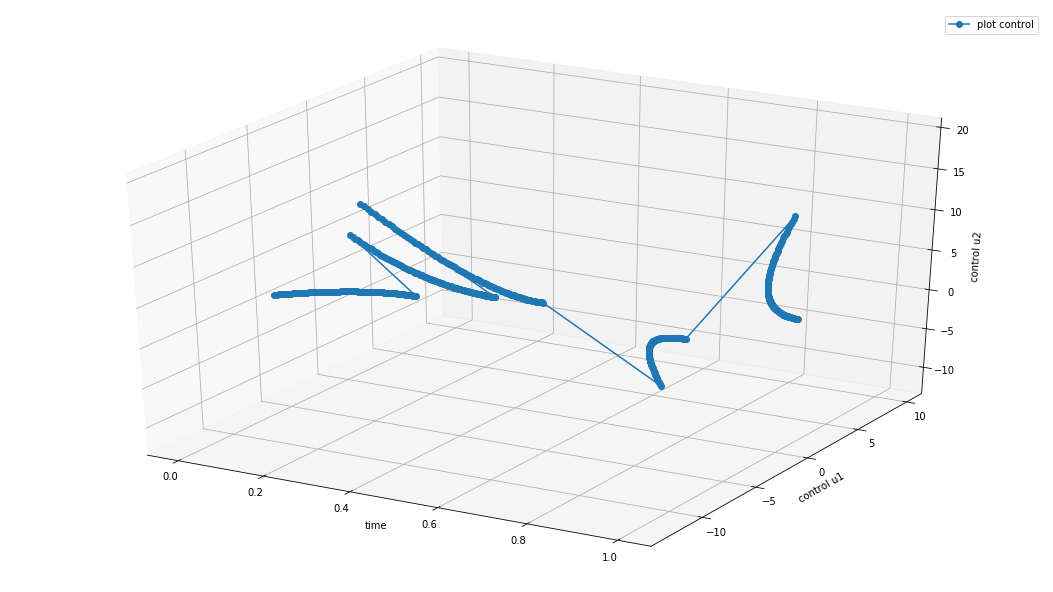

In [6]:
    mpl.rcParams['legend.fontsize'] = 10
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    fig.set_size_inches(18.5, 10.5)
    
    ax.set_xlabel('time')
    ax.set_ylabel('control u1')
    ax.set_zlabel('control u2')
    
    ploty0=np.array(recordControl.index)
    ploty1=recordControl.values[:,0]
    ploty2=recordControl.values[:,1]
    ax.plot(ploty0, ploty1, ploty2, label=("plot control"), marker='o')
    ax.legend()

        
    plt.show()

        
